In [ ]:
import pandas as pd
import numpy as np
from econml.dml import CausalForestDML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('new_hope.csv')


est = CausalForestDML(
    model_t=RandomForestRegressor(),
    model_y=RandomForestRegressor(),
    n_estimators=100, 
    min_samples_leaf=5, 
    max_depth=10,  
    random_state=42
)


data_encoded = pd.get_dummies(data, columns=["State"])



A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


Estimated Treatment Effects: [-0.59594779 -0.39714945 -0.32338294 -0.05871239 -0.24922438 -0.48923044
 -0.61363783 -0.3103695  -0.44859656 -0.34833985 -0.52531878 -0.65875466
 -0.4723784  -0.4203223  -0.10760302 -0.46311052 -0.59495561 -0.39213477
 -0.45956921 -0.44131989 -0.02131671 -0.47779689 -0.17941432 -0.59003364
 -0.56759159 -0.27241781 -0.59982158 -0.32048065 -0.74042274 -0.53811252
 -0.41777666 -0.25655078 -0.3351126  -0.38207921 -0.59274675 -0.4809027
 -0.26413294 -0.20768198 -0.77378204 -0.17127039 -0.61623158 -0.40168774
 -0.31156924 -0.44918951 -0.44165022 -0.54840371 -0.37404386 -0.9439429
 -0.40590393 -0.12954405 -0.24031665  0.17344193 -0.65009272 -0.53447425
 -0.43730811 -0.36441565 -0.49618161 -0.42384605 -0.85658617 -0.15757311
 -0.44009055 -0.35448578 -0.31454801 -0.34797101 -0.34350825 -0.46921697
 -0.41718787 -0.44893375 -0.08353615 -0.97254504 -0.46415767 -0.54645079
 -0.53951975 -0.44131989 -0.22364572 -0.21004599 -0.3883795  -0.34539141
 -0.41909053 -0.51192426

A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


Lower bounds of treatment effects: [-0.99382747 -0.71475947 -0.76406859 -0.64768449 -0.56704447 -0.65740318
 -1.32500427 -1.14143021 -0.8862757  -0.75869503 -0.69033871 -1.0405657
 -1.09105097 -0.63442194 -0.4501788  -2.15020084 -1.16970062 -1.3881302
 -0.65323376 -0.63392565 -0.50476808 -0.98265923 -1.38392384 -1.35258587
 -1.14114896 -0.55826633 -1.34190885 -0.78921811 -1.59285484 -0.86474894
 -1.29737669 -0.69483795 -0.66929837 -0.62311672 -1.12309284 -0.81001419
 -0.61224758 -1.21081489 -1.22018057 -0.83616726 -1.38758539 -0.71863239
 -1.1451781  -1.27509168 -0.65787876 -1.51886324 -0.92791882 -1.58743571
 -0.65864989 -0.70265772 -0.68762764 -1.58820145 -1.17842642 -1.21818936
 -0.63318545 -1.14077546 -1.20447994 -0.63914253 -1.34526135 -0.86071753
 -0.87764677 -0.80053154 -0.82309691 -0.5873006  -0.77387866 -1.41789946
 -0.6945402  -0.63246309 -0.49271738 -1.99283274 -1.33690197 -1.36437153
 -1.3087835  -0.63392565 -0.75003271 -0.83301025 -0.66168197 -0.58300985
 -0.95048505 -0.93

A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


Mean Squared Error of outcome prediction: 39.18647188846063


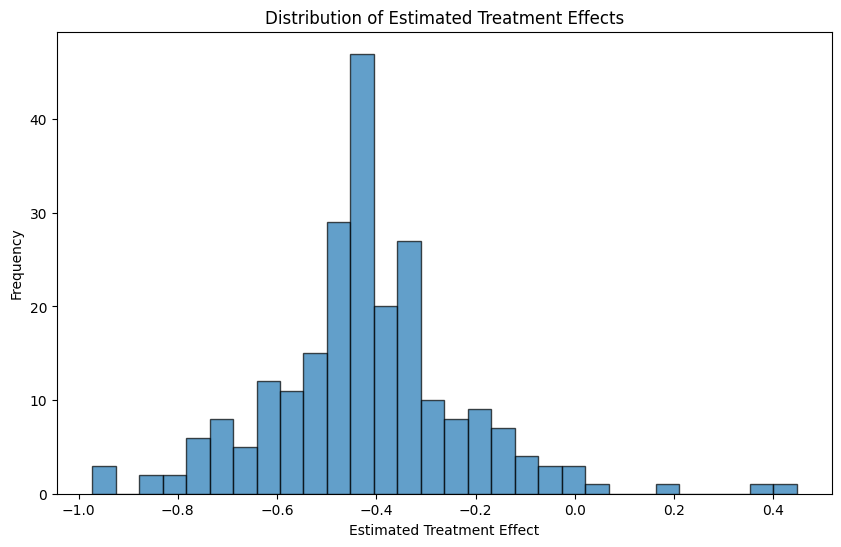

In [ ]:

treatment_columns = ["Year", "Effective Federal Funds Rate", "Inflation Rate", "Federal.Minimum.Wage.2020.Dollars", "Burglary"] + [col for col in data_encoded.columns if "State_" in col]
outcome_column = "Percent (%) of Labor Force Unemployed in State/Area"

treatment = data_encoded[treatment_columns]
outcome = data_encoded[outcome_column]
covariates = data_encoded.drop(columns=treatment_columns + [outcome_column])

X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(
    covariates, treatment, outcome, test_size=0.2, random_state=42
)


est.fit(Y_train, T_train, X=X_train)

te_effect = est.effect(X_test)

print("Estimated Treatment Effects:", te_effect)

lb, ub = est.effect_interval(X_test)
print("Lower bounds of treatment effects:", lb)
print("Upper bounds of treatment effects:", ub)

from sklearn.metrics import mean_squared_error

Y_pred = est.effect(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error of outcome prediction:", mse)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(te_effect, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Estimated Treatment Effect')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Treatment Effects')
plt.show()



In [37]:
# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error of outcome prediction:", mse)


Mean Squared Error of outcome prediction: 39.84431395511396


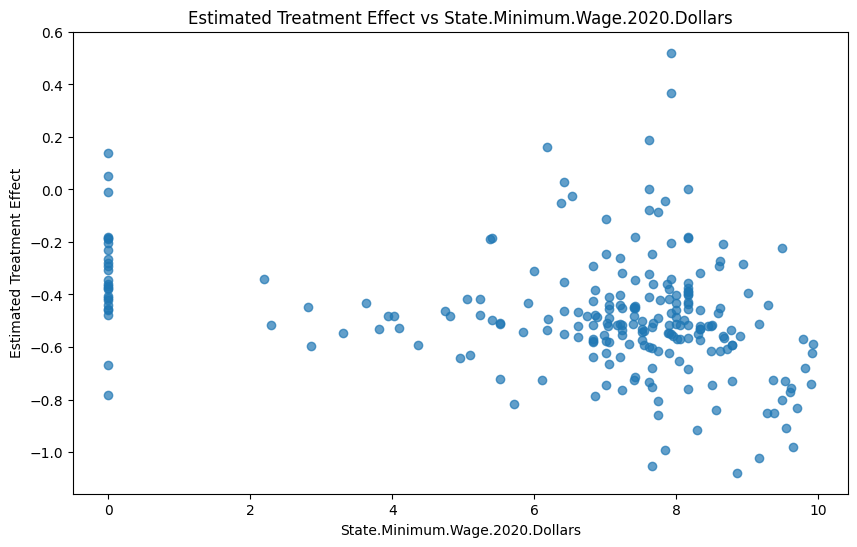

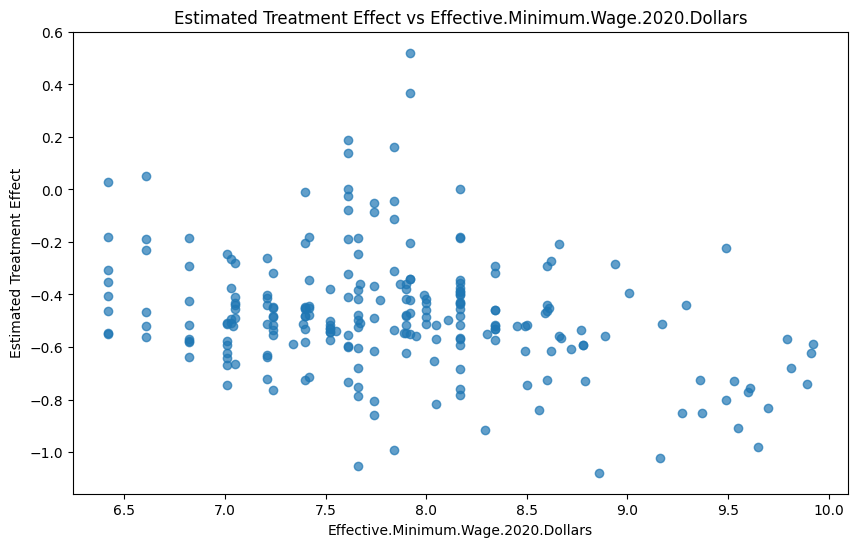

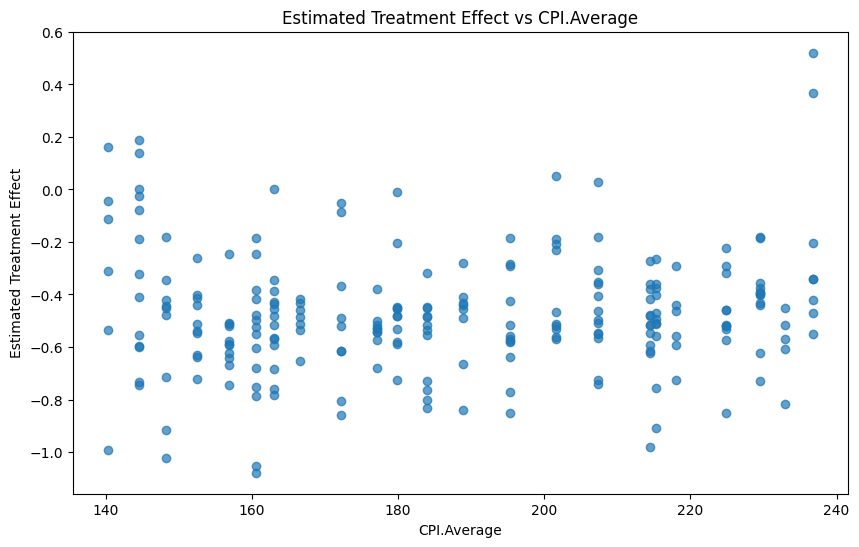

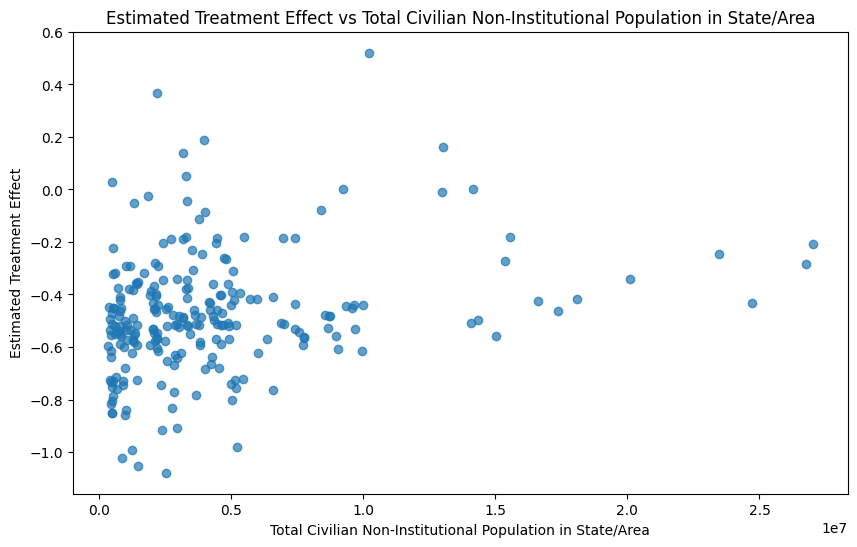

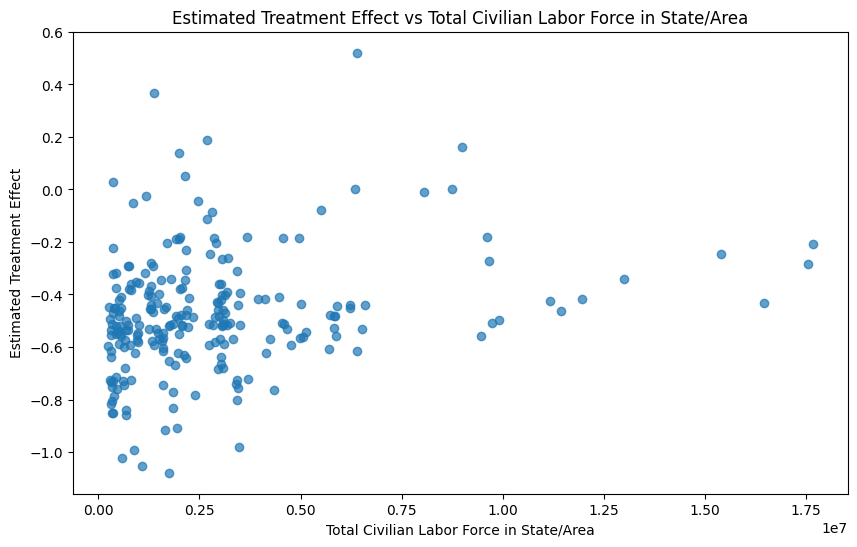

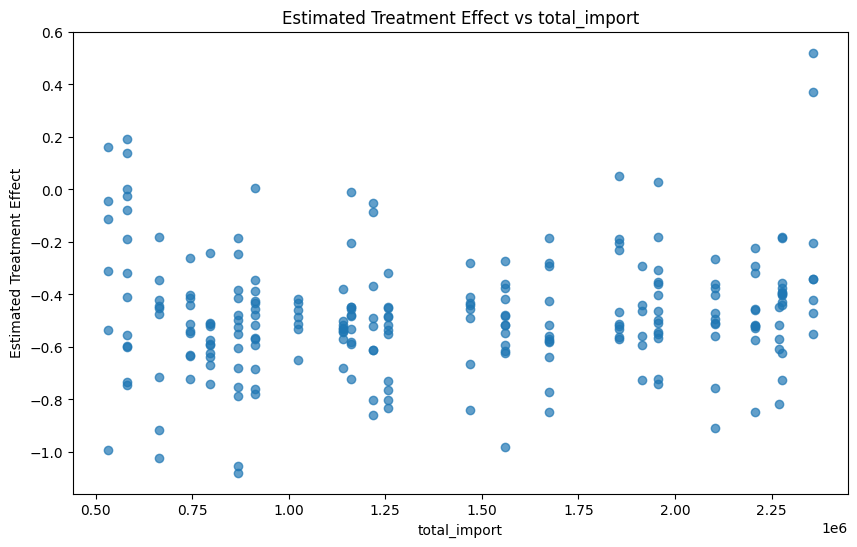

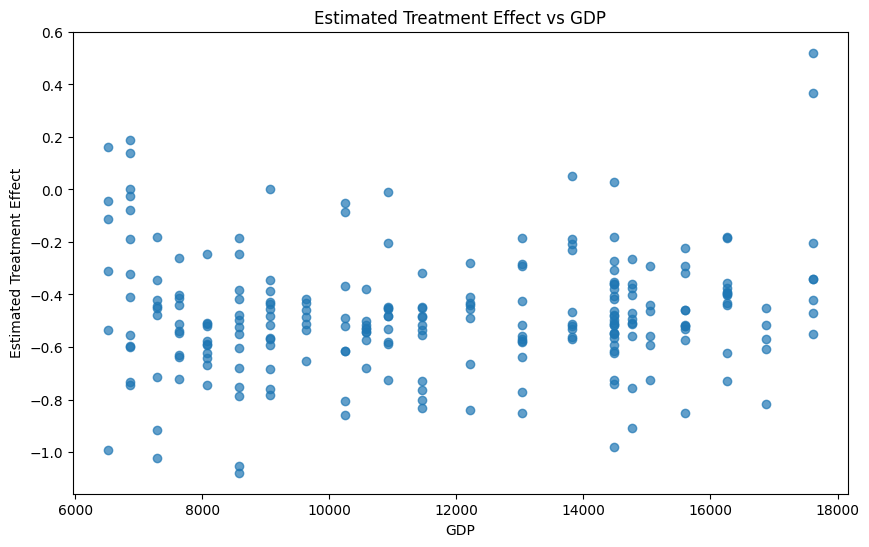

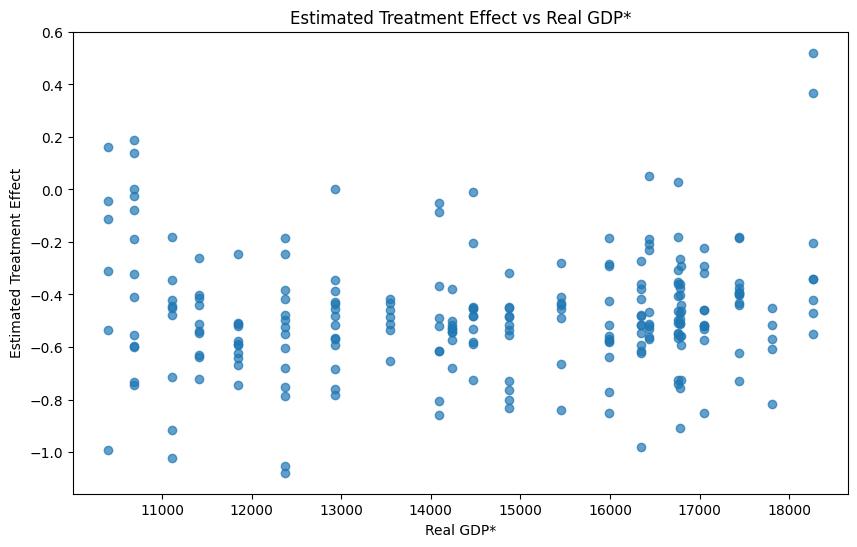

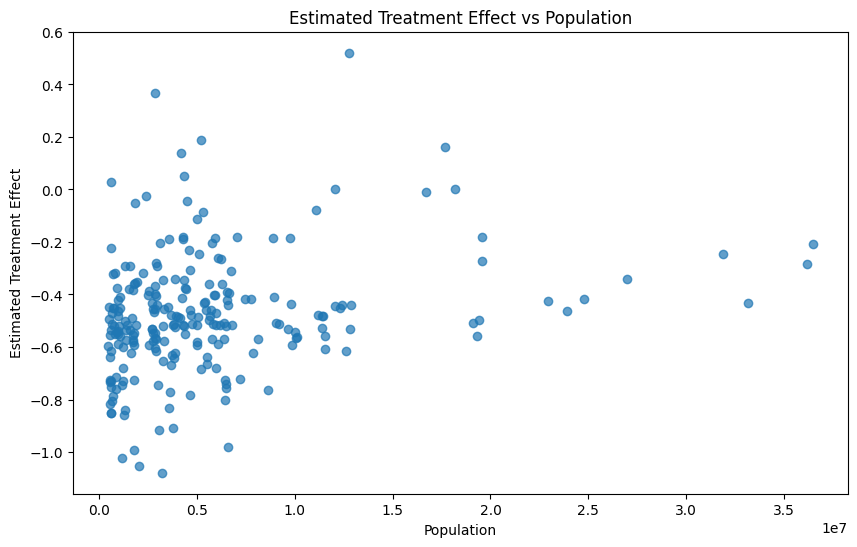

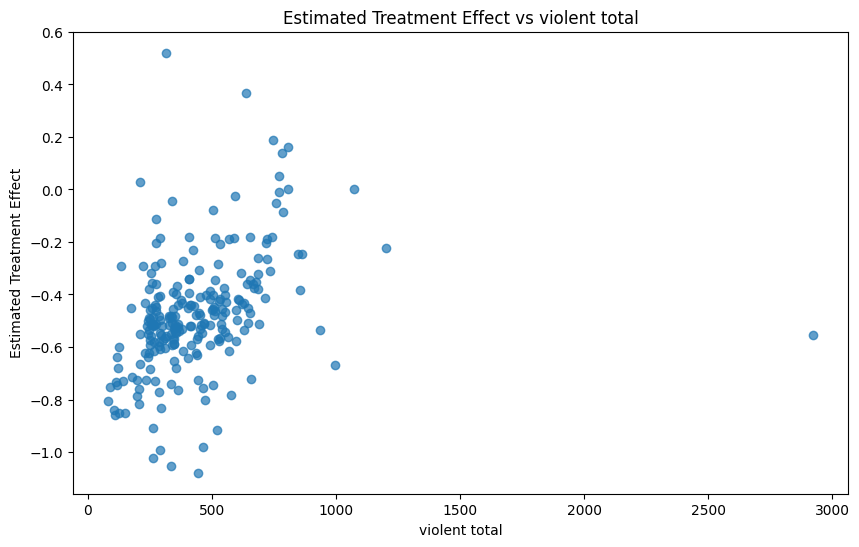

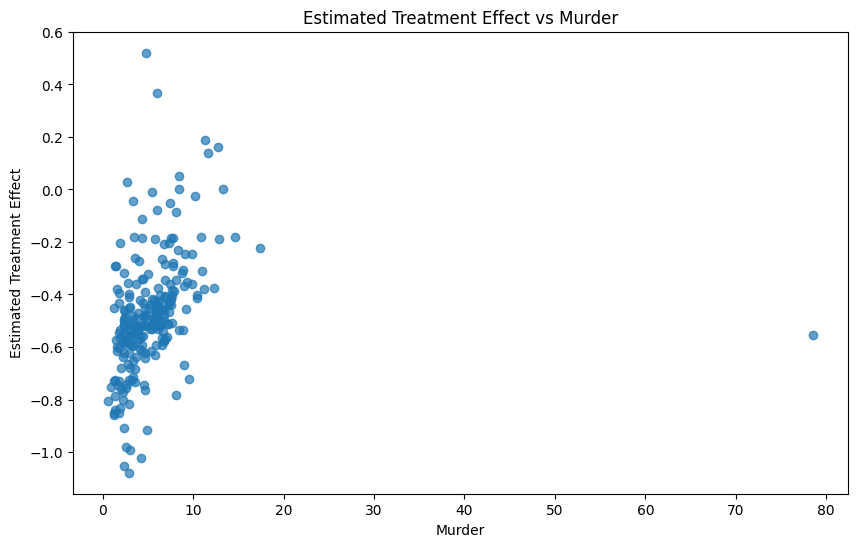

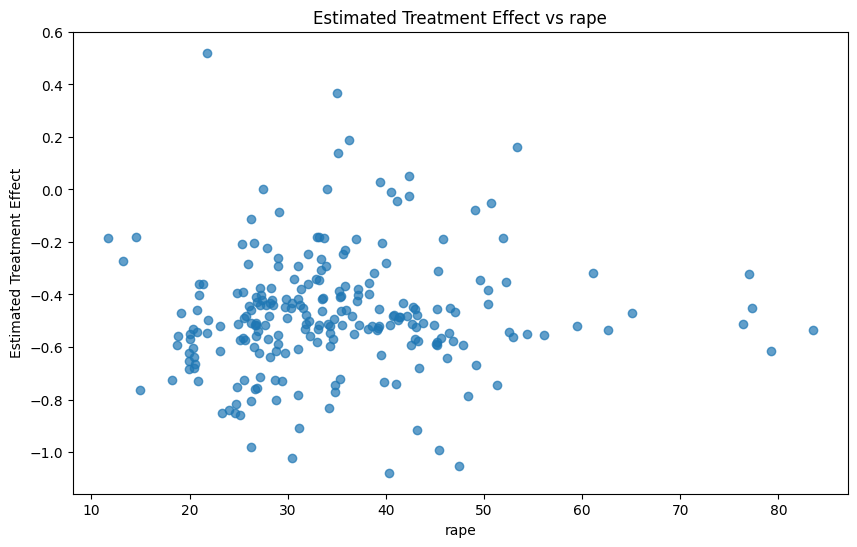

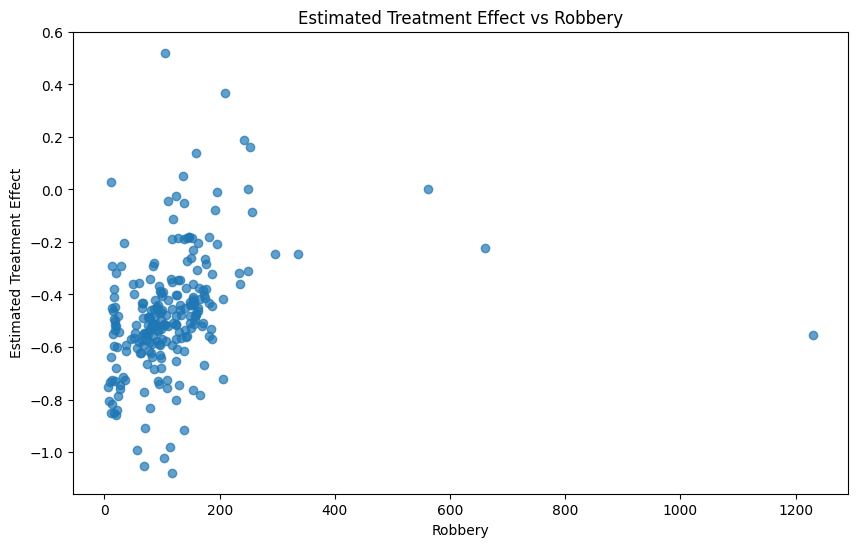

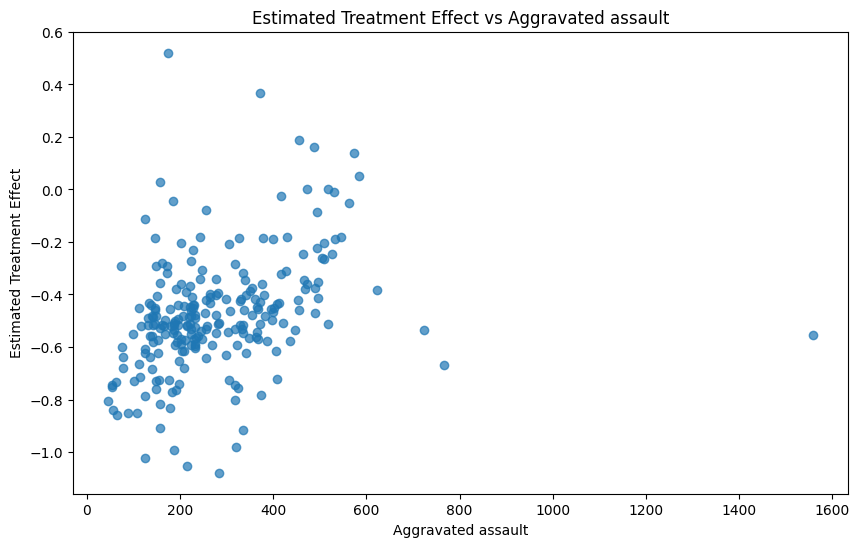

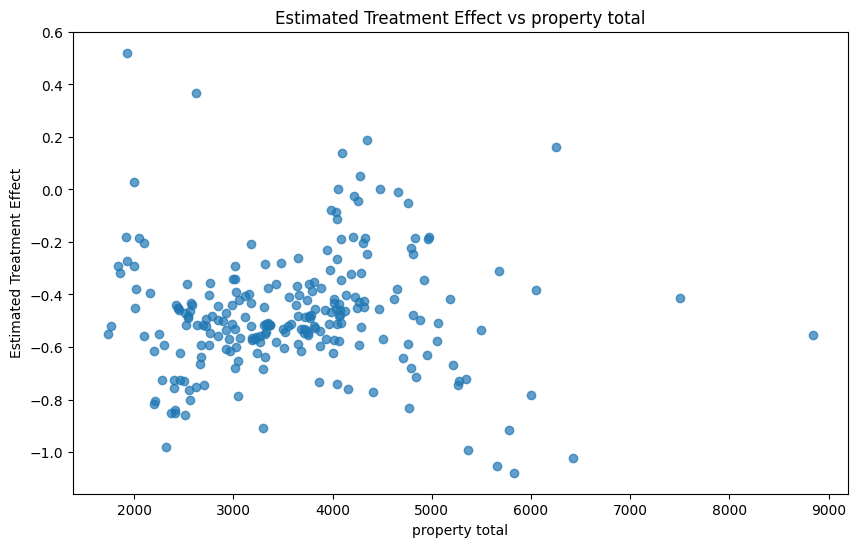

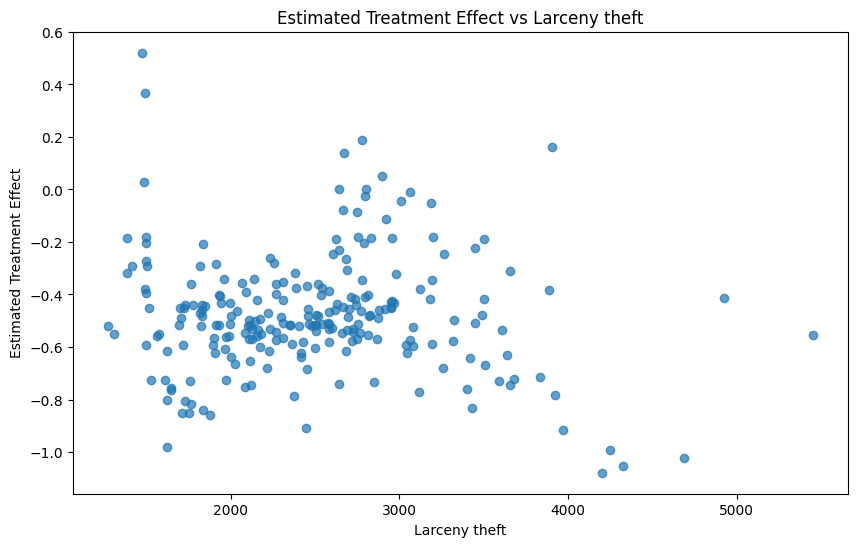

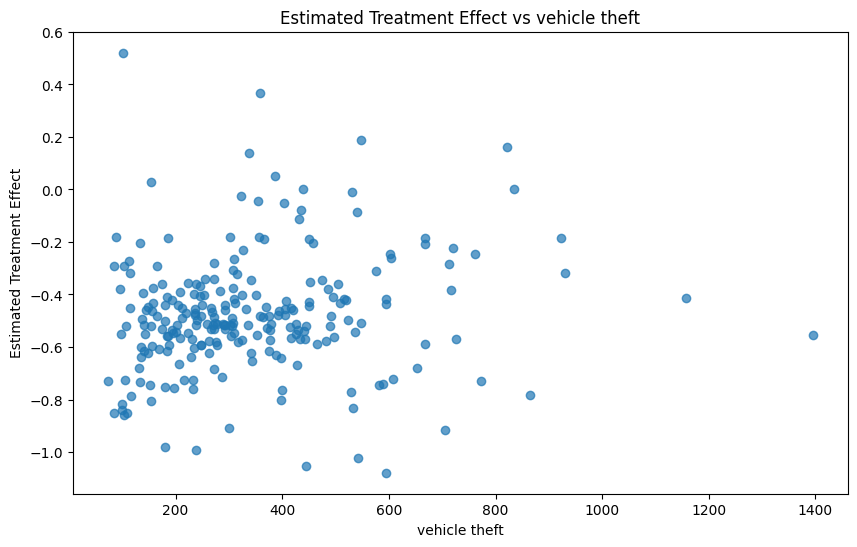

In [36]:

# Causal effect analysis for individual features
for feature in covariates:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[feature], te_effect, alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Estimated Treatment Effect')
    plt.title(f'Estimated Treatment Effect vs {feature}')
    plt.show()


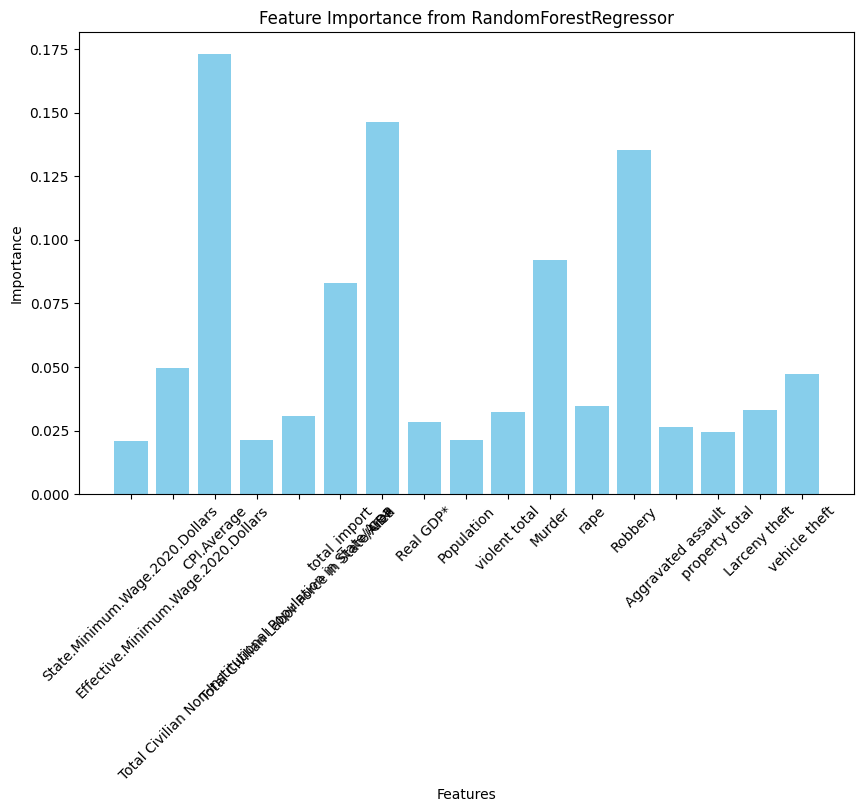

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from RandomForestRegressor')
plt.xticks(rotation=45)
plt.show()